In [1]:
# Import Libraries
import pandas as pd  #for Data Manipulation
import numpy as np #for Numerical Operations
import matplotlib.pyplot as plt #for Data Visualization
import seaborn as sns #for Data Visualization

# Import Modeling Llbraris
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score  # For evaluating the accuracy of the model
from sklearn.preprocessing import StandardScaler  # For standardizing the features

from sklearn.linear_model import LogisticRegression  # For creating a logistic regression model
from sklearn.tree import DecisionTreeClassifier # For creating a Decision Tree Classifier model
from sklearn.ensemble import RandomForestClassifier # For creating a Random Forest Classifier model
from sklearn.svm import LinearSVC # For creating a Linear SVC model

In [2]:
#Load the Train Dataset to Pandas DataFrame
titanic_data = pd.read_csv('data/train.csv')

In [3]:
#Explore the Dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Number of Rows and Columns
titanic_data.shape

(891, 12)

In [5]:
# Get information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Checking missing data
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [8]:
# Fill missing values in Age column with median value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [9]:
# Finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
# Fill in the missing entries in the "Embarked" column with the most frequently occurring value (mode)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [11]:
# Checking missing data
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# Obtain statistical summary of the DataFrame
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Compute value counts for 'Survived' column
survived_counts = titanic_data['Survived'].value_counts()
print("Survived:")
print(survived_counts)
print()

Survived:
0    549
1    342
Name: Survived, dtype: int64



In [14]:
# Compute value counts for 'Sex' column based on 'Survived' column
sex_counts_survived = titanic_data[titanic_data['Survived'] == 1]['Sex'].value_counts()
sex_counts_not_survived = titanic_data[titanic_data['Survived'] == 0]['Sex'].value_counts()

print("Survived - Sex:")
print(sex_counts_survived)
print()

print("Not Survived - Sex:")
print(sex_counts_not_survived)
print()


Survived - Sex:
female    233
male      109
Name: Sex, dtype: int64

Not Survived - Sex:
male      468
female     81
Name: Sex, dtype: int64



In [15]:
# Compute value counts for 'Age' column based on 'Survived' column
age_counts_survived = titanic_data[titanic_data['Survived'] == 1]['Age'].value_counts()
age_counts_not_survived = titanic_data[titanic_data['Survived'] == 0]['Age'].value_counts()

print("Survived - Age:")
print(age_counts_survived)
print()

print("Not Survived - Age:")
print(age_counts_not_survived)
print()

Survived - Age:
29.699118    52
24.000000    15
35.000000    11
27.000000    11
36.000000    11
             ..
55.000000     1
32.500000     1
12.000000     1
0.920000      1
47.000000     1
Name: Age, Length: 66, dtype: int64

Not Survived - Age:
29.699118    125
21.000000     19
28.000000     18
25.000000     17
18.000000     17
            ... 
15.000000      1
36.500000      1
23.500000      1
55.500000      1
74.000000      1
Name: Age, Length: 78, dtype: int64



In [16]:
# Count the number of passengers who survived or not based on fare
fare_survived_counts = titanic_data[titanic_data['Survived'] == 1]['Fare'].value_counts()
fare_not_survived_counts = titanic_data[titanic_data['Survived'] == 0]['Fare'].value_counts()

# Print the counts
print("Survived - Fare:")
print(fare_survived_counts)
print()

print("Not Survived - Fare:")
print(fare_not_survived_counts)
print()


Survived - Fare:
13.0000     16
26.0000     15
7.7500      12
10.5000      9
26.5500      8
            ..
55.4417      1
75.2500      1
108.9000     1
247.5208     1
24.0000      1
Name: Fare, Length: 153, dtype: int64

Not Survived - Fare:
8.0500     38
7.8958     37
13.0000    26
7.7500     22
26.0000    16
           ..
51.8625     1
90.0000     1
12.2750     1
9.3500      1
10.5167     1
Name: Fare, Length: 177, dtype: int64



In [17]:
# Count the number of passengers who survived or not based on Pclass
pclass_survived_counts = titanic_data[titanic_data['Survived'] == 1]['Pclass'].value_counts()
pclass_not_survived_counts = titanic_data[titanic_data['Survived'] == 0]['Pclass'].value_counts()

# Print the counts
print("Survived - Pclass:")
print(pclass_survived_counts)
print()

print("Not Survived - Pclass:")
print(pclass_not_survived_counts)
print()


Survived - Pclass:
1    136
3    119
2     87
Name: Pclass, dtype: int64

Not Survived - Pclass:
3    372
2     97
1     80
Name: Pclass, dtype: int64



In [18]:
# Compute value counts for 'SibSp' column
sibsp_counts = titanic_data['SibSp'].value_counts()
print("SibSp:")
print(sibsp_counts)
print()

SibSp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64



In [19]:
# Compute value counts for 'Parch' column
parch_counts = titanic_data['Parch'].value_counts()
print("Parch:")
print(parch_counts)
print()

Parch:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64



In [20]:
# Set seaborn as the default visualisation library
sns.set()

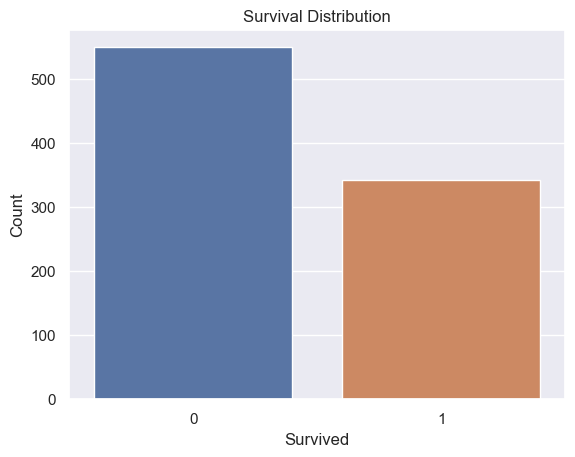

In [21]:
# Plot a bar chart to visualize the distribution of survival (0 = Not Survived, 1 = Survived)
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

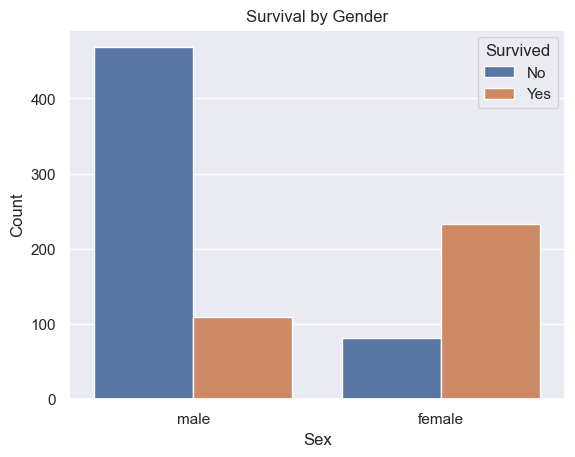

In [22]:
# Plot a bar chart to compare the count of survivors and non-survivors based on gender
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

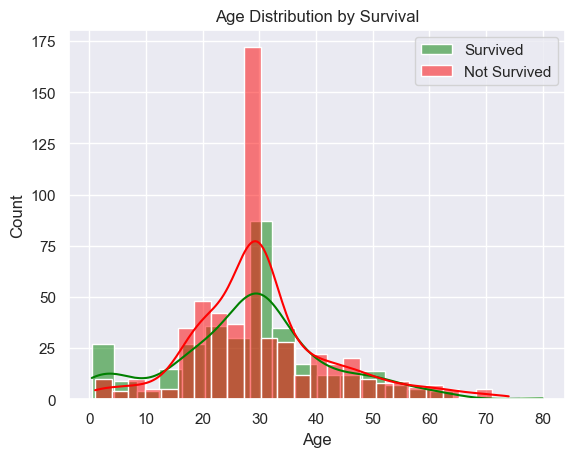

In [23]:
# Filter the DataFrame based on 'Survived' column
age_survived = titanic_data[titanic_data['Survived'] == 1]['Age']
age_not_survived = titanic_data[titanic_data['Survived'] == 0]['Age']

# Plot a histogram for passengers who survived
sns.histplot(age_survived, kde=True, color='green', label='Survived')

# Plot a histogram for passengers who did not survive
sns.histplot(age_not_survived, kde=True, color='red', label='Not Survived')

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

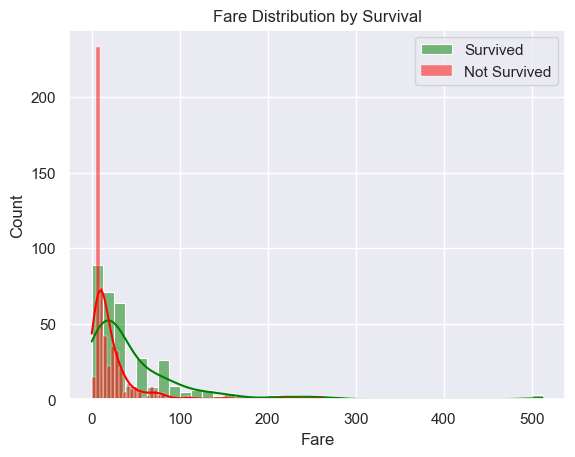

In [24]:
# Filter the DataFrame based on 'Survived' column
fare_survived = titanic_data[titanic_data['Survived'] == 1]['Fare']
fare_not_survived = titanic_data[titanic_data['Survived'] == 0]['Fare']

# Plot a histogram for passengers who survived
sns.histplot(fare_survived, kde=True, color='green', label='Survived')

# Plot a histogram for passengers who did not survive
sns.histplot(fare_not_survived, kde=True, color='red', label='Not Survived')

plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

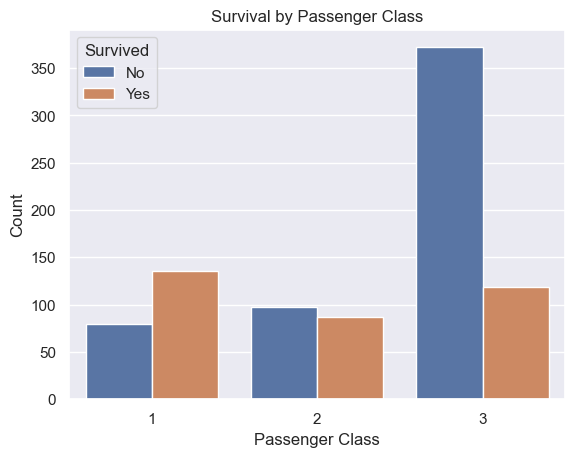

In [25]:
# Plot a bar chart to compare the count of survivors and non-survivors based on passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

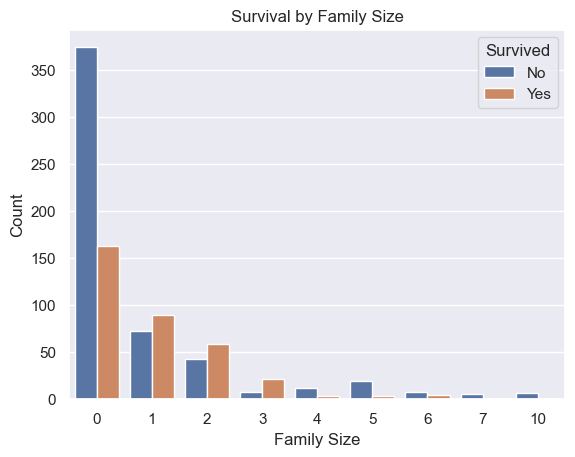

In [26]:
# Assuming 'FamilySize' column exists, combining 'SibSp' and 'Parch'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

# Plot a bar chart to compare the count of survivors and non-survivors based on family size
sns.countplot(x='FamilySize', hue='Survived', data=titanic_data)
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_2132\1701240813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = titanic_data.corr()


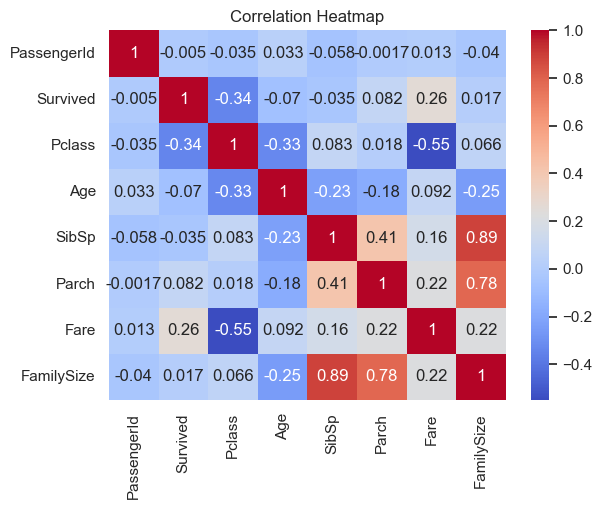

In [27]:
# Compute the correlation matrix
correlation = titanic_data.corr()

# Plot a heatmap to visualize the correlations between different variables
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# Convert categorical data 'Sex' to numerical data
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

In [29]:
# Convert categorical data 'Embarked' to numerical data
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [30]:
#Explore the Dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


In [31]:
# Drop columns 'PassengerId', 'Name', 'Ticket', 'Survived' from the DataFrame and assign the result to 'X'
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)

# Extract the 'Survived' column and assign it to 'Y'
Y = titanic_data['Survived']

In [32]:
# Print the contents of 'X'
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  FamilySize
0         3    0  22.000000      1      0   7.2500         0           1
1         1    1  38.000000      1      0  71.2833         1           1
2         3    1  26.000000      0      0   7.9250         0           0
3         1    1  35.000000      1      0  53.1000         0           1
4         3    0  35.000000      0      0   8.0500         0           0
..      ...  ...        ...    ...    ...      ...       ...         ...
886       2    0  27.000000      0      0  13.0000         0           0
887       1    1  19.000000      0      0  30.0000         0           0
888       3    1  29.699118      1      2  23.4500         0           3
889       1    0  26.000000      0      0  30.0000         1           0
890       3    0  32.000000      0      0   7.7500         2           0

[891 rows x 8 columns]


In [33]:
# Print the contents of 'Y'
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [34]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


In [36]:
# Initialize the Logistic Regression model
model = LogisticRegression()

In [37]:
# Fit the model on the training data
model.fit(X_train, Y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Predict the target for training data
X_train_prediction = model.predict(X_train)

In [39]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [40]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8103932584269663


In [41]:
# Predict the target for test data
X_test_prediction = model.predict(X_test)

In [42]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [43]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8103932584269663


In [44]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [45]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [46]:
# Calculate the accuracy score of the test data predictions
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


In [47]:
# Assuming you have trained the model and obtained the predictions
# Create a DataFrame with the PassengerId and predicted Survived values
predictions = pd.DataFrame({'PassengerId': titanic_data['PassengerId'].iloc[X_test.index], 'Survived': X_test_prediction})

# Save the DataFrame as a CSV file
predictions.to_csv('predictions.csv', index=False)

In [48]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7821229050279329


In [49]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(Y_test, Y_pred_dtree)
print("Decision Tree Accuracy:", accuracy_dtree)

Decision Tree Accuracy: 0.776536312849162


In [50]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8100558659217877


In [51]:
# Linear SVM
svm = LinearSVC()
svm.fit(X_train, Y_train)
Y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("Linear SVM Accuracy:", accuracy_svm)

Linear SVM Accuracy: 0.7318435754189944


C:\Users\PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
